In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from autots import AutoTS  # 827 star
from autots.evaluator.anomaly_detector import AnomalyDetector, HolidayDetector
from autots.datasets import load_live_daily
#from autots.datasets import load_linear

from autots.datasets import load_hourly


from sktime.forecasting.model_selection import temporal_train_test_split
#一般异常检测
from pyod.models.knn import KNN  #7.4k star  A Comprehensive and Scalable Python Library for Outlier Detection (Anomaly Detection) For time-series outlier detection, please use TODS
from pyod.models.iforest import IForest

from adtk.detector import SeasonalAD  #963 star  无监督异常检测
#时间序列异常检测
from pmdarima.arima import auto_arima  #1.4k star  时间序列预测
from pmdarima.datasets import load_wineind
#from stumpy import stump

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [162]:
#数据加载
# # internet connection required to load this df
# wiki_pages = [
#  "Standard_deviation",
#  "Christmas",
#  "Thanksgiving",
#  "all",
# ]
# df = load_live_daily(
#  long=False,
#  fred_series=None,
#  tickers=None,
#  trends_list=None,
#  earthquake_min_magnitude=None,
#  weather_stations=None,
#  london_air_stations=None,
#  gov_domain_list=None,
#  weather_event_types=None,
#  wikipedia_pages=wiki_pages,
#  sleep_seconds=5,
# )
# df.to_csv('load_live_daily.csv')

df_load_live_daily = pd.read_csv('load_live_daily.csv', header=0) #autots的load_live_daily函数的数据集，避免频繁下载保存在本地

autots_datasets=['load_daily',#target
    #'load_live_daily',#online
    'load_monthly',
    #'load_yearly',
    'load_hourly',#target
    #'load_weekly',
    #'load_weekdays',
    #'load_zeroes',
    'load_linear',
    'load_sine',
    'load_artificial'
]

from autots.datasets import load_daily
from autots.datasets import load_monthly
from autots.datasets import load_hourly
from autots.datasets import load_linear
from autots.datasets import load_sine
from autots.datasets import load_artificial

df_load_daily = load_daily()
print(str(df_load_daily.head(10))+'\n')
print(str(df_load_daily.count())+'\n')
print(str(df_load_daily.dtypes)+'\n')
#print(str(df_load_daily.describe())+'\n')
series_id_count = df_load_daily.loc[:, 'series_id'].nunique()
print(str(series_id_count)+'\n')

#     datetime           series_id     value
# 0 2017-01-01  wiki_United_States  114051.0
# 1 2017-01-02  wiki_United_States   41916.0

#df = load_monthly()
#print(str(df.head(10))+'\n')
#     datetime  value series_id                              series_name
# 0 1953-04-01   2.83      GS10  10-Year Treasury Constant Maturity Rate
# 1 1953-05-01   3.05      GS10  10-Year Treasury Constant Maturity Rate

df_load_hourly = load_hourly()
print(str(df_load_hourly.head(10))+'\n')
print(str(df_load_hourly.count())+'\n')
print(str(df_load_hourly.dtypes)+'\n')
#print(str(df_load_hourly.describe())+'\n')
series_id_count = df_load_hourly.loc[:, 'series_id'].nunique()
print(str(series_id_count)+'\n')

#              datetime   series_id value
# 0 2016-10-01 00:00:00  clouds_all  20.0
# 1 2016-10-01 01:00:00  clouds_all  20.0


df = load_linear()
#print(str(df.head(10))+'\n')
#               0     1     2     3     4
# 2021-01-01  0.0   1.0   2.0   3.0   4.0
# 2021-01-02  0.0   2.0   4.0   6.0   8.0


df = load_sine()
#print(str(df.head(10))+'\n')
#               0         1         2         3         4
# 2021-01-01  0.0  0.462482  3.813054  0.025971  7.061509
# 2021-01-02  0.0  1.818765  0.119695  3.782314  6.562881


print('\n\n'+'----------------------------------------')
#df = load_artificial()
#print(str(df.head(10))+'\n')
#             white_noise  white_noise_trend  random_walk  arima007_trend  \
# 2021-09-11    -0.608169          -0.091281        -0.64            2.00   
# 2021-09-12    -1.247293          -1.045219         0.00            2.01   
# 2021-09-13     0.026872           0.337244         0.64            2.02   
# 2021-09-14    -0.636580           0.877046         0.00            1.63   
# 2021-09-15    -0.637570           0.681100        -0.64            1.64   
# 2021-09-16     0.395300           0.123835        -0.64            0.85   
# 2021-09-17     0.971297           0.427159        -0.64            1.26   
# 2021-09-18    -0.572402           3.002556        -1.28            0.47   
# 2021-09-19    -0.031739           0.438572        -0.64            0.08   
# 2021-09-20    -0.586998           1.165633        -1.28            0.09   

#             arima017  arima200_gamma  arima220_outliers  linear  sine_wave  \
# 2021-09-11 -0.066667        0.293528          -0.062918   0.000   0.000000   
# 2021-09-12 -0.066667        0.384978           1.203648   0.025   0.841471   
# 2021-09-13 -0.066667        0.919248           3.274850   0.050   0.909297   
# 2021-09-14 -0.066667        3.645023           4.350546   0.075   0.141120   
# 2021-09-15 -0.066667        3.785149           4.407691   0.100  -0.756802   
# 2021-09-16 -0.066667        2.349957           4.982531   0.125  -0.958924   
# 2021-09-17 -0.033333        1.129939           5.607965   0.150  -0.279415   
# 2021-09-18  0.033333        2.580826           4.867808   0.175   0.656987   
# 2021-09-19  0.066667        4.119977           3.755261   0.200   0.989358   
# 2021-09-20  0.133333        3.140111           3.819698   0.225   0.412118   

#             sine_seasonality_monthweek  ...  wavelet_morlet      lumpy  \
# 2021-09-11                    1.147061  ...    3.672968e-15   3.164042   
# 2021-09-12                    1.288658  ...   -3.843828e-15   1.081992   
# 2021-09-13                    1.637035  ...   -7.010759e-14   1.728671   
# 2021-09-14                    1.676800  ...   -2.257248e-13   3.764760   
# 2021-09-15                    1.955539  ...    5.296631e-14   4.596018   
# 2021-09-16                    1.739061  ...    3.027120e-12  11.816925   
# 2021-09-17                    1.800803  ...    1.047696e-11   4.206783   
# 2021-09-18                    2.018634  ...    3.451023e-12   1.913474   
# 2021-09-19                    2.032528  ...   -9.910891e-11   2.365324   
# 2021-09-20                    1.650328  ...   -3.691102e-10   3.046170   

#             intermittent_random  intermittent_weekly  out_of_stock  \
# 2021-09-11                    1                    0      0.000000   
# 2021-09-12                    1                    0      0.000000   
# 2021-09-13                    0                    0      0.000000   
# 2021-09-14                    0                    0      0.000000   
# 2021-09-15                    1                    1      0.000000   
# 2021-09-16                    0                    0      0.000000   
# 2021-09-17                    0                    2      0.000000   
# 2021-09-18                    0                    0      0.000000   
# 2021-09-19                    0                    0      5.062876   
# 2021-09-20                    0                    1      4.344729   

#             cubic_root  logistic_growth  recent_spike  recent_plateau  \
# 2021-09-11   -7.113787         0.693147      0.006927       -0.012130   
# 2021-09-12   -7.107194         1.098612      0.012719        0.012370   
# 2021-09-13   -7.100588         1.386294      0.163301        0.003095   
# 2021-09-14   -7.093971         1.609438      0.084808        0.025942   
# 2021-09-15   -7.087341         1.791759      0.034067        0.063986   
# 2021-09-16   -7.080699         1.945910      0.090341        0.072229   
# 2021-09-17   -7.074044         2.079442      0.104927        0.061390   
# 2021-09-18   -7.067377         2.197225      0.083299       -0.045969   
# 2021-09-19   -7.060697         2.302585      0.113109        0.013489   
# 2021-09-20   -7.054004         2.397895      0.042601        0.079093   

#             old_to_new  
# 2021-09-11    1.000592  
# 2021-09-12    1.017172  
# 2021-09-13    1.032149  
# 2021-09-14    1.047358  
# 2021-09-15    1.068279  
# 2021-09-16    1.098612  
# 2021-09-17    1.128223  
# 2021-09-18    1.130102  
# 2021-09-19    1.088558  
# 2021-09-20    1.048065  

    datetime           series_id     value
0 2017-01-01  wiki_United_States  114051.0
1 2017-01-02  wiki_United_States   41916.0
2 2017-01-03  wiki_United_States   45976.0
3 2017-01-04  wiki_United_States   44760.0
4 2017-01-05  wiki_United_States   44223.0
5 2017-01-06  wiki_United_States   44649.0
6 2017-01-07  wiki_United_States   40068.0
7 2017-01-08  wiki_United_States   41823.0
8 2017-01-09  wiki_United_States   51655.0
9 2017-01-10  wiki_United_States   50912.0

datetime     50169
series_id    50169
value        50169
dtype: int64

datetime     datetime64[ns]
series_id            object
value               float64
dtype: object

21

             datetime   series_id value
0 2016-10-01 00:00:00  clouds_all  20.0
1 2016-10-01 01:00:00  clouds_all  20.0
2 2016-10-01 02:00:00  clouds_all  56.0
3 2016-10-01 03:00:00  clouds_all  56.0
4 2016-10-01 04:00:00  clouds_all  56.0
5 2016-10-01 05:00:00  clouds_all  24.0
6 2016-10-01 06:00:00  clouds_all  24.0
7 2016-10-01 07:00:00  clouds_al

In [163]:
#个性化的数据预处理
df_load_daily['datetime'] = pd.to_datetime(df_load_daily['datetime'],format='%Y-%m-%d %H:%M:%S')
df_load_daily = df_load_daily.set_index('datetime')
df_load_daily = df_load_daily.pivot(columns='series_id', values='value')



df_load_hourly['datetime'] = pd.to_datetime(df_load_hourly['datetime'],format='%Y-%m-%d %H:%M:%S')
df_load_hourly = df_load_hourly.set_index('datetime')
df_load_hourly = df_load_hourly.pivot(columns='series_id', values='value')
df_load_hourly.drop(columns='weather_main',inplace=True)
df_load_hourly.drop(columns='snow_1h',inplace=True)
df_load_hourly.drop(columns='rain_1h',inplace=True)
df_load_hourly=df_load_hourly.select_dtypes(include=['object']).astype(float)##

df_load_live_daily['date'] = pd.to_datetime(df_load_live_daily['date'],format='%Y-%m-%d')
df_load_live_daily = df_load_live_daily.set_index('date')

In [164]:
df_load_hourly.head(10)

series_id,clouds_all,temp,traffic_volume
datetime,,,
2016-10-01 00:00:00,20.0,286.22,1195.0
2016-10-01 01:00:00,20.0,285.60,776.0
2016-10-01 02:00:00,56.0,285.49,666.0
2016-10-01 03:00:00,56.0,284.59,448.0
2016-10-01 04:00:00,56.0,284.26,512.0
2016-10-01 05:00:00,24.0,284.14,958.0
2016-10-01 06:00:00,24.0,283.95,1655.0
2016-10-01 07:00:00,24.0,283.86,2535.0
2016-10-01 08:00:00,20.0,284.15,3462.0


In [165]:
df_load_daily.head(10)

series_id,wiki_Chinese_New_Year,wiki_Christmas,wiki_Cleopatra,wiki_Easter,wiki_Elizabeth_II,wiki_George_Washington,wiki_Germany,wiki_Google_Chrome,wiki_History_of_the_hamburger,wiki_Jesus,...,wiki_List_of_countries_that_have_gained_independence_from_the_United_Kingdom,wiki_List_of_highest-grossing_films,wiki_Michael_Jackson,wiki_Microsoft_Office,wiki_Periodic_table,wiki_Standard_deviation,wiki_Thanksgiving,wiki_United_States,wiki_William_Shakespeare,wiki_all
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01,17856.0,12909.0,6472.0,3278.0,146215.0,9652.0,14292.0,10047.0,598.0,12738.0,...,589.0,28465.0,27846.0,2018.0,8047.0,3299.0,2642.0,114051.0,11968.0,656671918.0
2017-01-02,12468.0,12926.0,6954.0,3949.0,147651.0,17244.0,17740.0,11089.0,523.0,13794.0,...,628.0,32588.0,22837.0,3124.0,10740.0,6047.0,2962.0,41916.0,16215.0,728007693.0
2017-01-03,16045.0,12410.0,6450.0,4139.0,111446.0,17042.0,20220.0,12911.0,579.0,13102.0,...,757.0,27284.0,23818.0,3568.0,13478.0,8924.0,2681.0,45976.0,20276.0,714241317.0
2017-01-04,15152.0,11078.0,6427.0,4000.0,90087.0,14340.0,17468.0,12173.0,720.0,12720.0,...,759.0,24302.0,28674.0,3874.0,15148.0,9944.0,2946.0,44760.0,22065.0,701189902.0
2017-01-05,14302.0,10642.0,7020.0,3911.0,87214.0,14863.0,16940.0,13251.0,652.0,12157.0,...,794.0,23331.0,22566.0,3962.0,17070.0,9853.0,2506.0,44223.0,21427.0,706048039.0
2017-01-06,12642.0,13017.0,6321.0,3615.0,81690.0,14656.0,16438.0,13362.0,638.0,12018.0,...,656.0,21817.0,21544.0,3486.0,14184.0,8740.0,2470.0,44649.0,18582.0,684165739.0
2017-01-07,9380.0,14151.0,6360.0,3308.0,96342.0,11725.0,15327.0,9506.0,536.0,11753.0,...,679.0,22146.0,25030.0,2898.0,10897.0,5502.0,2225.0,40068.0,14727.0,706496661.0
2017-01-08,9811.0,8690.0,7394.0,3829.0,119362.0,14088.0,16024.0,9610.0,471.0,13756.0,...,673.0,27634.0,24254.0,3209.0,12593.0,6266.0,2906.0,41823.0,19577.0,744157627.0
2017-01-09,15469.0,8153.0,7231.0,3818.0,121637.0,16326.0,19051.0,12478.0,472.0,12165.0,...,804.0,27264.0,21117.0,4101.0,17006.0,10978.0,2544.0,51655.0,24649.0,744965525.0


/Users/edmundzhang/anaconda3/lib/python3.11/site-packages/numpy/ma/extras.py:290: UserWarning: Warning: converting a masked element to nan.
  _d = func(tuple([np.asarray(a) for a in x]), *args, **params)
/Users/edmundzhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:2035: UserWarning: Warning: converting a masked element to nan.
  result = asarray(a).shape


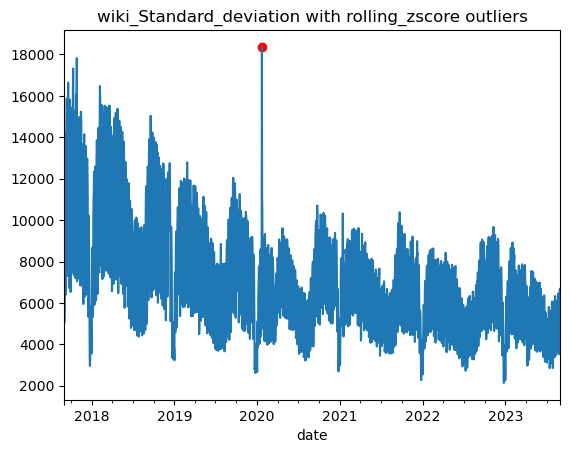

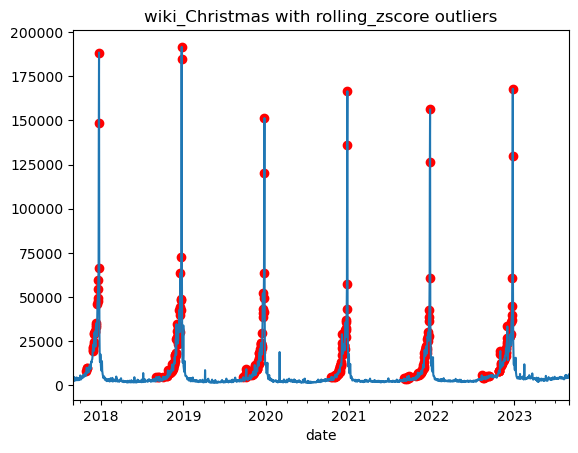

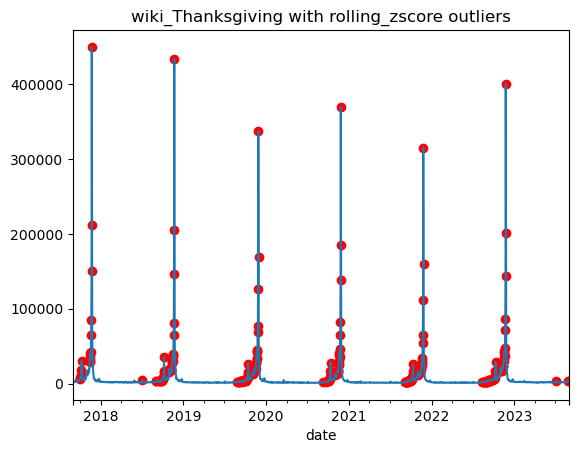

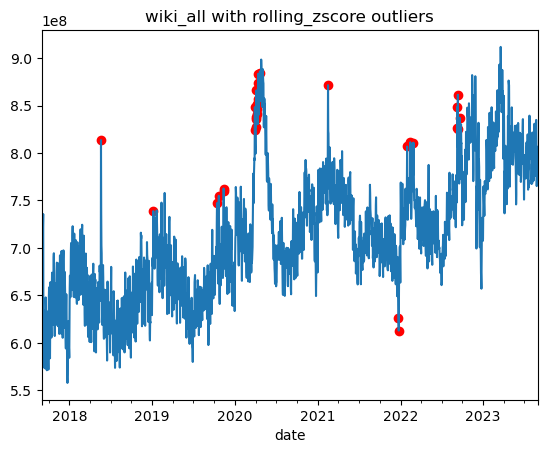

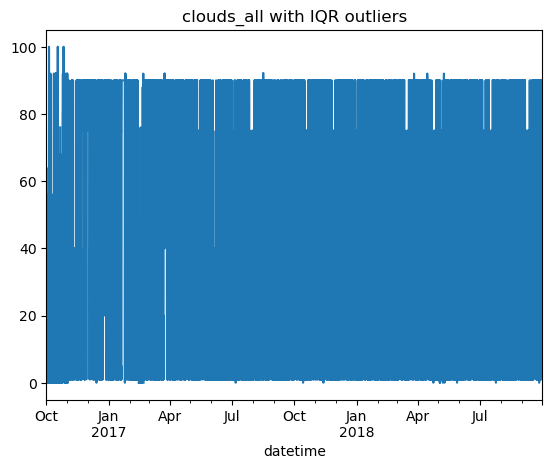

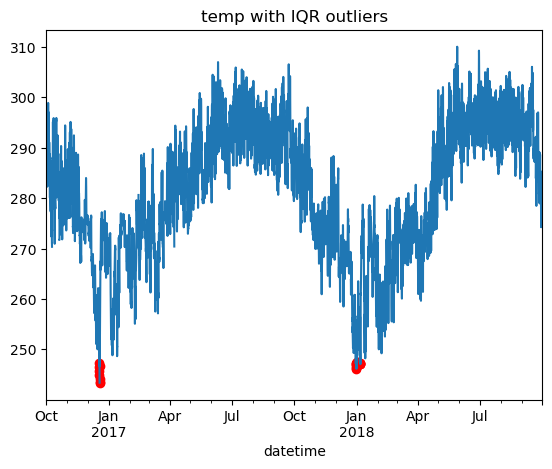

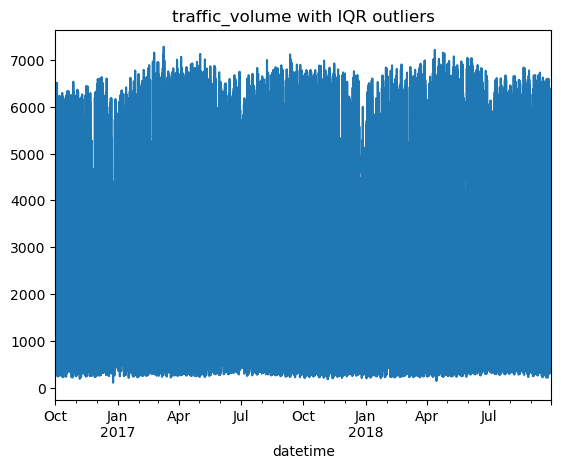

In [168]:
#df_datasets = [df_load_live_daily, df_load_daily, df_load_hourly]
df_datasets = [df_load_live_daily,df_load_hourly]
#df_datasets = [df_load_hourly]
for df_datase in df_datasets:
    params = AnomalyDetector.get_new_params()
    mod = AnomalyDetector(output='multivariate', **params)
    mod.detect(df_datase)
    for col_name in df_datase.columns:
        mod.plot(series_name=col_name)
    #print(mod.scores) # meaning of scores varies by method



# # holiday detection, random parameters
# holiday_params = HolidayDetector.get_new_params()
# mod = HolidayDetector(**holiday_params)
# mod.detect(df)
# # several outputs are possible, you'll need to subset results from multivariate inputs
# full_dates = pd.date_range("2014-01-01", "2024-01-01", freq='D')
# prophet_holidays = mod.dates_to_holidays(full_dates, style="prophet")
# mod.plot()

/Users/edmundzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


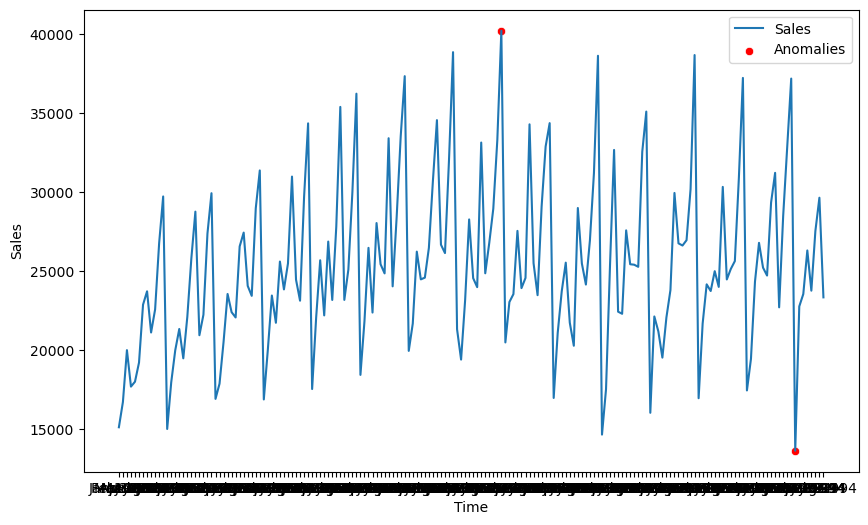

In [55]:
# # 读入数据
# data = load_wineind(as_series=True)

# # 将数据转换为DataFrame对象
# df = pd.DataFrame({'Sales': data.values}, index=data.index)

# # 创建Isolation Forest模型并训练
# model = IForest(n_estimators=100, contamination=0.01, random_state=42)
# model.fit(df)

# # 预测异常点
# anomalies = pd.DataFrame(model.predict(df),columns=['anomalies'],index=df.index)

# # 使用 concat 函数按列合并两个 DataFrame
# df_anomalies = pd.concat([df, anomalies], axis=1)

# # 绘制时间序列图
# plt.figure(figsize=(10, 6))
# sns.lineplot(   data=df_anomalies, x=df_anomalies.index, y='Sales'    ,label='Sales')
# df_anomalies_temp = df_anomalies.loc[df_anomalies['anomalies'] == 1]
# sns.scatterplot(data=df_anomalies_temp, x=df_anomalies_temp.index, y='Sales', color='red', label='Anomalies')
# plt.xlabel('Time')
# plt.ylabel('Sales')
# plt.show()

In [54]:
# def detect_anomalies(data, algorithms):
#     #print('1*1'+str(data.head(10))+"*\n")
#     # Convert time column to datetime and set as index
#     data['time'] = pd.to_datetime(data['time'], unit='s')
#     #print('2*2'+str(data.head(10))+"*\n")
#     data = data.set_index('time')
    
#     #print('3*3'+str(data.head(10))+"*\n")
#     # Pivot data to wide format with key as columns
#     data = data.pivot(columns='key', values='value')
    
#     #print('4*4'+str(data.head(10))+"*\n")
#     # Initialize results DataFrame
#     results = pd.DataFrame(index=data.index)
    
#     # Apply selected algorithms to each column and add results to results DataFrame
#     for col in data.columns:
#         # if 'auto_arima' in algorithms:
#         #     arima_model = auto_arima(data[col], seasonal=False, trace=False)
#         #     #arima_model = auto_arima(data[col], seasonal=False, trace=False)
#         #     results[f'{col}_auto_arima'] = arima_model.predict(n_periods=1)
                    
# #         if 'autots' in algorithms:
            
# #             params = AnomalyDetector.get_new_params()
# #             mod = AnomalyDetector(output='multivariate', **params)
# #             mod.detect(data)
# #             mod.plot()
# #             mod.scores # meaning of scores varies by method

# #             # holiday detection, random parameters
# #             holiday_params = HolidayDetector.get_new_params()
# #             mod = HolidayDetector(**holiday_params)
# #             mod.detect(data)
# #             # several outputs are possible, you'll need to subset results from multivariate inputs
# #             full_dates = pd.date_range("2014-01-01", "2024-01-01", freq='D')
# #             prophet_holidays = mod.dates_to_holidays(full_dates, style="prophet")
# #             mod.plot()

        
#         if 'knn' in algorithms:            
#             knn_model = KNN(n_neighbors=2)
#             knn_model.fit(data[col].values.reshape(-1, 1))
#             results[f'{col}_knn'] = knn_model.predict(data[col].values.reshape(-1, 1))
        
# #        if 'seasonal_ad' in algorithms:
# #            seasonal_ad_detector = SeasonalAD()
# #            results[f'{col}_seasonal_ad'] = seasonal_ad_detector.fit_detect(data[col])
        
# #        if 'stump' in algorithms:
# #            stump_results = stump(data[col].values.astype('float64'), m=3)
# #            results[f'{col}_stump'] = stump_results[:, 0]
        
#     return results

# data = [['user1', 0, 100],
#         ['user1', 9, 130],
#         ['user1', 12, 100],
#         ['user1', 20, 1700],
#         ['user1', 22, 100],
        
#         ['user2', 0, 100],
#         ['user2', 9, 130],
#         ['user2', 12, 100],
#         ['user2', 20, 170],
#         ['user2', 22, 100],]

# data = pd.DataFrame(data, columns=['key', 'time', 'value'])
# # #algorithms = ['auto_arima', 'autots', 'knn', 'seasonal_ad', 'stump']
# algorithms = ['auto_arima','knn']


# results = detect_anomalies(data, algorithms)

# print(results)

                     user1_knn  user2_knn
time                                     
1970-01-01 00:00:00          0          0
1970-01-01 00:00:09          0          0
1970-01-01 00:00:12          0          0
1970-01-01 00:00:20          1          0
1970-01-01 00:00:22          0          0
